# __Training a neural network for a toy classification problem__

<h1><a id='toc'></a>Summary</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#I">1. Framework (problem, data, shape of the neural network) </a></li>
        <li><a href="#II">2. The gradient descent method </a></li>
        <li><a href="#III">3. The stochastic gradient method with minibatch. </a></li> 
        <li><a href="#IV">4. Stabilization by decaying learning rate</a></li>
    </ul>

We start by importing the *toynn_2023* library. It defines three classes *ToyPb*, *nD_data* and *ToyNN*.<br>
See the ipython file *Introduction_to_the_toynn_2023_toolbox.ipynb* for a description of these classes and associated methods.

In [1]:
from toynn_2023 import *
# also loads the libraries:
#    import numpy as np
#    from numpy import random as nprd
#    from matplotlib import pyplot as plt
#    from matplotlib import cm as cm
#    from copy import deepcopy as dcp

# 1. Framework (problem, data, shape of the neural network) <a id='I'></a>

<a href="#toc">top</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

We start by defining a classification problem of points in the plane. This problem is described by a _pb_ object of the _ToyPb_ class.

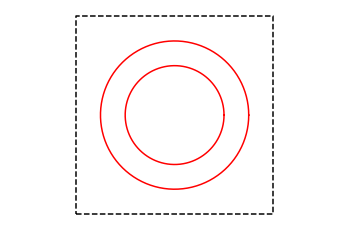

In [2]:
pb = ToyPb(name = "ring", bounds = (-1,1))
pb.show_border()

We then build a set of random points of the plan which are "tagged" according to the previous problem ($1$ if the point is in the disk, $-1$ otherwise). This data is stored in a _data_ object of the *nD_data* class.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The number of tagged points is *data.n*.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The coordinates of these points are stored in the numpy array _data.X_ of size (*data.n*$)\times2$.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Tags are stored in the numpy _data.Y_ array of length *data.n*.

The data from _data_ will be used for training. We can also build a set of data of the same type _test_ for the tests (for instance to check that there is no "overfitting".

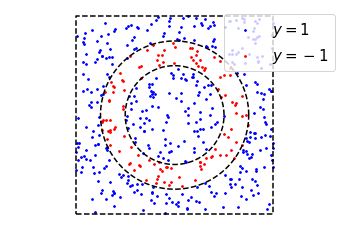

In [3]:
ndata = 1000
data = nD_data(n = ndata, pb = pb)

ntest = 500
test = nD_data(n = ntest, pb = pb, init_pred='yes')

test.show_class()
pb.show_border('k--')
plt.legend(loc=1, fontsize=15)
plt.show()

Finally, we build an object of type _ToyNN_ which defines a type of neural network, characterized by the parameters _CardNodes_ and the activation function _chi_.

In [4]:
CardNodes = (2, 4, 6, 4, 1)
nn = ToyNN(card = CardNodes, chi="tanh", grid=(-1,1,41))

# 2. The gradient descent method
<a id='II'></a>

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

We wish to minimize the function:
$$
F(A)=\dfrac1{n_d}\sum_{i=0}^{n_d-1}\ell(h(x_i,A)\times y_i).
$$
where:<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) $A$ contains the coefficients (weights) of a neural network of type *nn*,<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) The $x_i$ and $y_i$ are the training data stored in *data.X*[i] and *data.Y*[i],<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) $h(x,A)$ is the value returned by the neural network of weights $A$ with the input $x$,<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) $\ell$ is the *pb.loss* error function.

One step of the gradient method consists of:
$$
A\ \longleftarrow\ A - \alpha\nabla F(A).
$$

__Initialization__. We define:<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) An initial set of coefficients in the form of a randomly constructed coef-list _A_.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) An float _alpha_ corresponding to the learning rate ($\alpha=0.05$ here).<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) A total number of iterations _Niter_.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) A integer _niter_ initialized to 0 which will represent the number of iterations performed.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) An integer _Ndata_ representing the size of the data.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) A integer _niterplot_ indicating the frequency of plots during iterations (one plot every _niterplot_ iterations). <br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) An empty list *Total_loss* to store the evolution of the total error during the iterations:
$$
A\ \longleftarrow\ A - \alpha\nabla F(A).
$$

In [5]:
# Parameters
alpha=.1  #(learning rate)
Niter=500
Ndata=data.n
niterplot=50

# Initializations
A=nn.create_rand()
niter=0
Erreur =[]

__Optimization loop__. We then implement the descent gradient method with constant step (or constant learning rate) _alpha_.

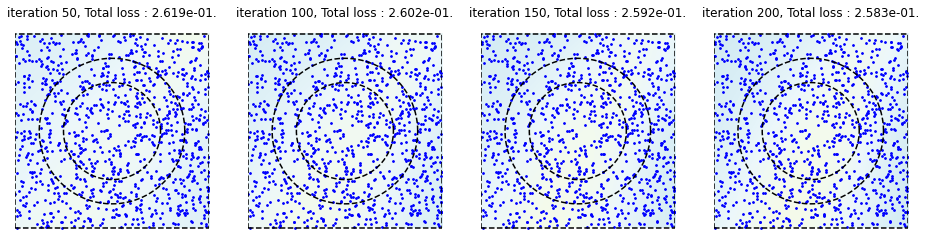

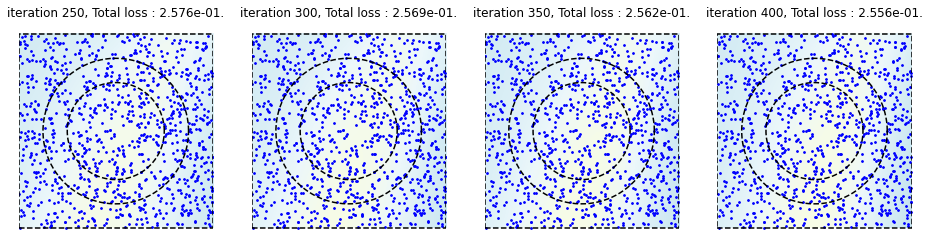

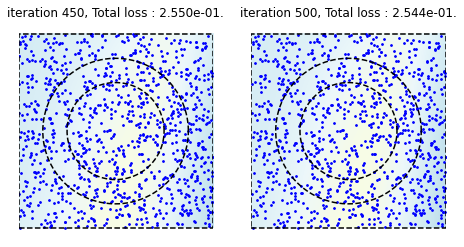

In [6]:
posplot=0
# Optimization loop for the gradient descent method
for i_ in range(Niter):
    niter+=1
    # initialization of dA
    dA=nn.create_zero()
    # computation of -alpha*sum gradient of f_j
    for j in range(Ndata): nn.descent(A,data.X[j],data.Y[j],B=dA, pb=pb)
        
    # update df the coefficients of A
    nn.add(A,dA,c=alpha/Ndata, output=False)
    
    # computation of the error and graphic representations
    
    if not niter%niterplot:
        error = nn.total_loss_and_prediction(A,data,pb=pb)
        Erreur.append(error)
        if not posplot: plt.figure(figsize=(16,4))
        posplot+=1
        plt.subplot(1,4,posplot)
        data.show_class(pred=True)
        nn.show_pred(A)
        pb.show_border('k--')
        plt.title(f"iteration {niter}, Total loss : {error:1.3e}.", fontsize=12)
        if posplot==4 :  
            plt.show()
            posplot=0
    else:
        error = nn.total_loss(A,data,pb=pb)
        Erreur.append(error) 

Note that you can restart the optimization loop (without reinitializing) by executing the previous block again. You may repeat the operation until you are satisfied with the performance of the neural network. 

We use the method *nn.show()* to represent the coefficients of the last computed _A_.
and we represent the evolution of the error along the iterations. 

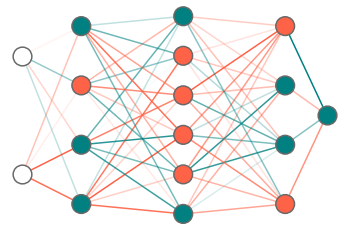

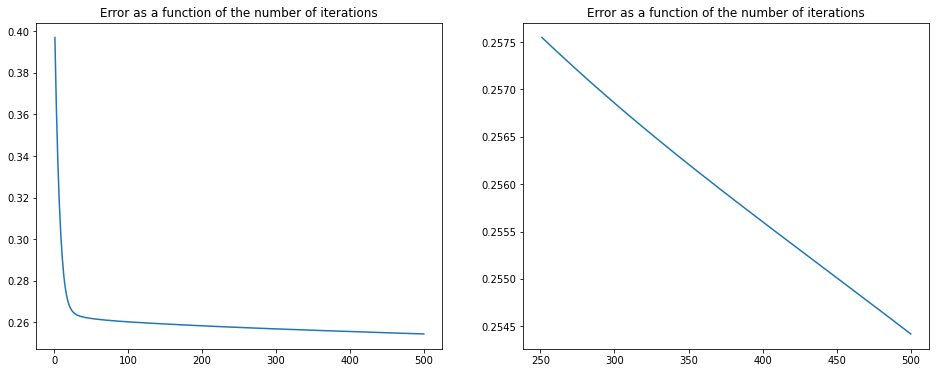

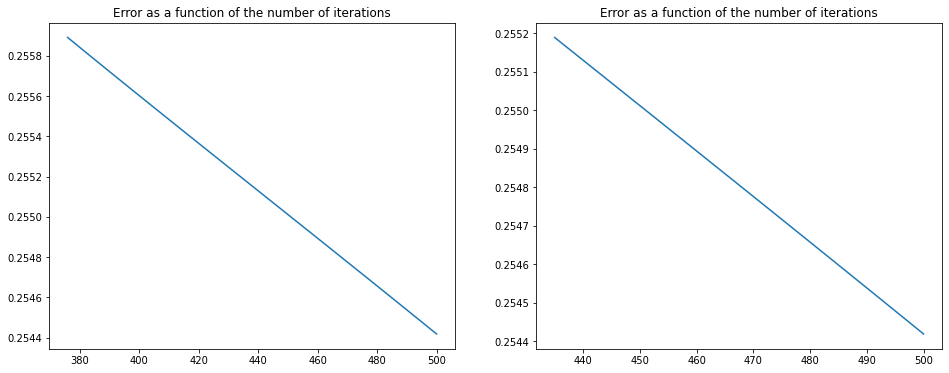

In [7]:
## Graphic representation of the evolution of the error along the iterations.
nn.show(A)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(np.linspace(1,niter,niter),Erreur)
plt.title("Error as a function of the number of iterations")

plt.subplot(122)
debut = niter//2
plt.plot(np.linspace(debut+1, niter,niter-debut),Erreur[debut:])
plt.title("Error as a function of the number of iterations")
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(121)
debut = 3*(niter//4)
plt.plot(np.linspace(debut+1, niter,niter-debut),Erreur[debut:])
plt.title("Error as a function of the number of iterations")

plt.subplot(122)
debut = 7*(niter//8)
plt.plot(np.linspace(debut+1, niter,niter-debut),Erreur[debut:])
plt.title("Error as a function of the number of iterations")
plt.show()

# 3. The stochastic gradient method with minibatch<a id='III'></a> 

<a href="#toc">top</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

The initialization is the same as in the previous part except that the counter *niter* is replaced by the counter *nepoch*. The number of epochs is counted instead of the number of iterations.

We introduce the integer *nbatch*. 

The cost of one iteration of the stochastic gradient with minibtach is approximately (nbatch/Ndata) times the cost of one iteration of the full gradient. So (for fair comparison) one epoch contains (Ndata//nbatch) iterations. In the end the cost of one epoch is approximately the same as the cost of one iteration of full gradient.

In [8]:
# Parameters
alpha=0.1  #(learning rate)
Nepoch=500
Ndata=data.n
nepochplot=20

nbatch=30
ItersInOneEpoch = Ndata//nbatch

# Initializations
A=nn.create_rand()
nepoch=0
Erreur =[]

The optimization loop is different. An tuple *J* of nbatch integers are drawn randomly in the set $\{0,1,2,\dots,N-1\}$ using *J=nprd.randint(Ndata,size=nbatch)*.

We calculate the new iterate by making a gradient step for the function
$$
F_J(A)=\frac1{nbatch}\sum_{i\in J}\ell(h(x^i,A)\times y^i)
$$
where $x^i=$*data.X*[i] and $y^i=$*data.Y*[i].<br>
The new iterate is obtained by
$$
A\ \longleftarrow\ A - \alpha \nabla F_i(A).
$$

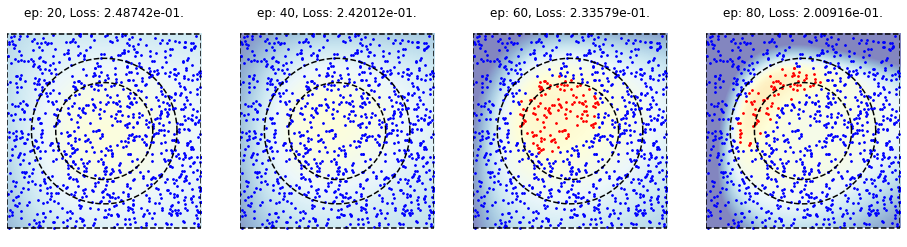

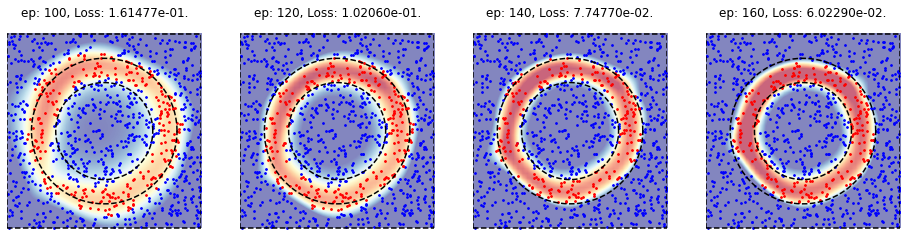

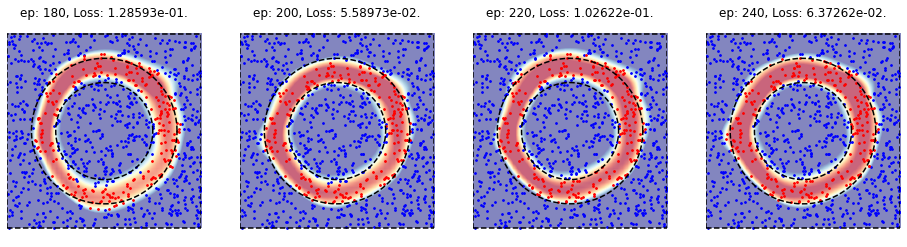

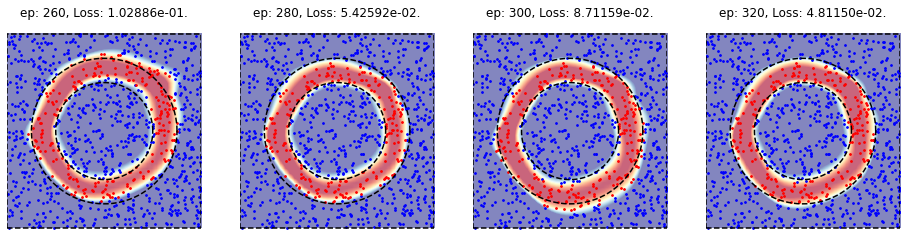

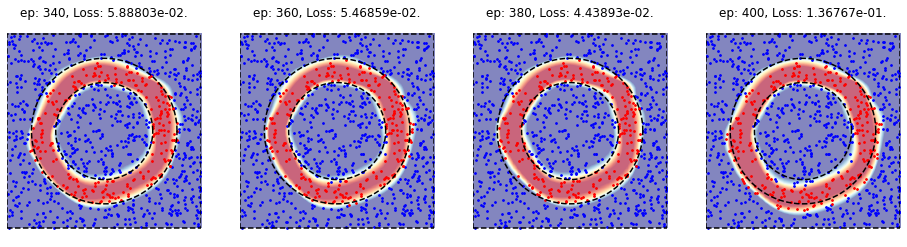

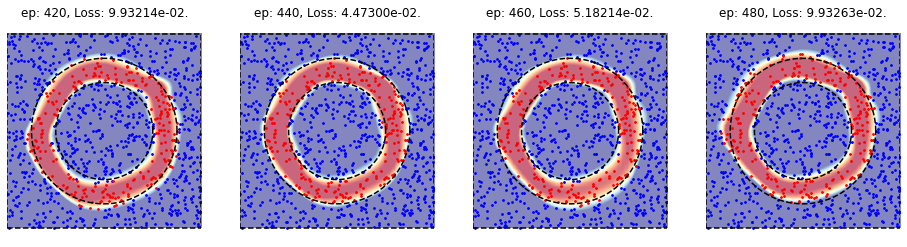

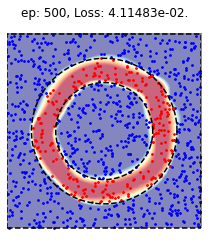

In [9]:
posplot=0
# Optimization loop for the stochastic gradient method
for i_ in range(Nepoch): # loop on the epochs
    nepoch+=1
    for j_ in range(ItersInOneEpoch):  # in each epoch, loop on the iterations
        J = nprd.randint(Ndata, size=nbatch)    # draw nbatch random integers 
        
        # computation of the descent direction
        dA=nn.create_zero()
        for i in J:   nn.descent(A, data.X[i], data.Y[i], B=dA, pb=pb)
        
        # update of the coefficients
        nn.add(A,dA,c=alpha/nbatch,output=False)
    
    # computation of the error and graphic representations
    if not nepoch%nepochplot:
        error = nn.total_loss_and_prediction(A,data,pb=pb)
        Erreur.append(error)
        if not posplot: plt.figure(figsize=(16,4))
        posplot+=1
        plt.subplot(1,4,posplot)
        data.show_class(pred=True)
        nn.show_pred(A)
        pb.show_border('k--')
        plt.title(f"ep: {nepoch}, Loss: {error:1.5e}.", fontsize=12)
        if posplot==4 :  
            plt.show()
            posplot=0
    else:
        error = nn.total_loss(A,data,pb=pb)
        Erreur.append(error)
        #print(f"epoch {nepoch}, Total loss : {error:1.5e}.")

Graphic representations:

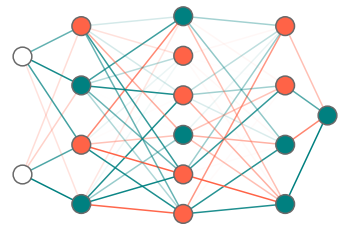

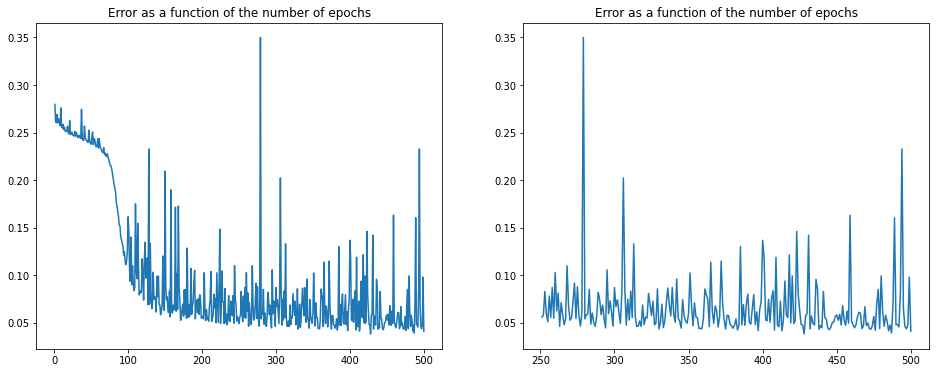

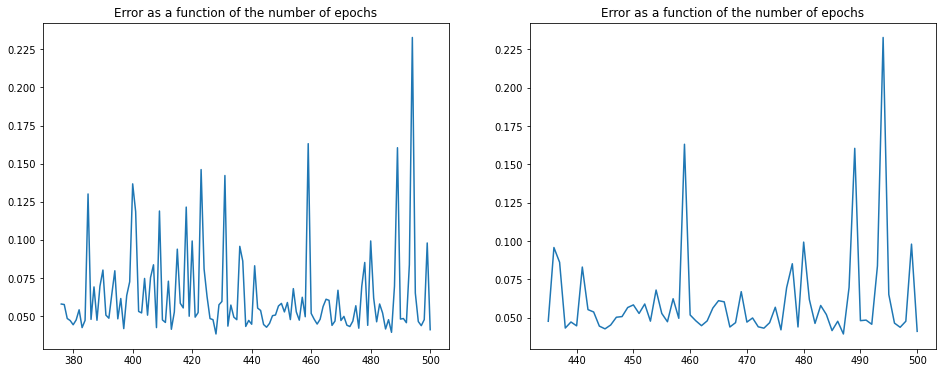

In [10]:
## Graphic representation of the evolution of the error along the iterations.
nn.show(A)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(np.linspace(1,nepoch,nepoch),Erreur)
plt.title("Error as a function of the number of epochs")

plt.subplot(122)
debut = nepoch//2
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Error as a function of the number of epochs")
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(121)
debut = 3*(nepoch//4)
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Error as a function of the number of epochs")

plt.subplot(122)
debut = 7*(nepoch//8)
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Error as a function of the number of epochs")
plt.show()

# 4. Stabilization by decaying learning rate <a id='IV'></a> 

<a href="#toc">top</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

We try to stabilize the convergence of the algorithm by slowly decaying the learning rate, with the formula:

$$
\alpha_k\quad\leftarrow\quad\frac{\alpha_0}{1+k/K}.
$$

where $\alpha_k$ is the learning rate at the $k^{\text{th}}$ iteration (not the  $k^{\text{th}}$ epoch!). 

The parameter $\alpha_0$ is the initial learning rate and the parameter $K$ controls the decay of the learning rates.

Remark that after $mK$ iterations, the learning rate has been devided by $m+1$.

In [11]:
# Parameters
alpha0=0.1  #(initial learning rate)
Nepoch=500
Ndata=data.n
nepochplot=20

nbatch=30

ItersInOneEpoch = Ndata//nbatch
K=100*(ItersInOneEpoch)

# Initializations
A=nn.create_rand()
nepoch=0
Erreur =[]
k=0

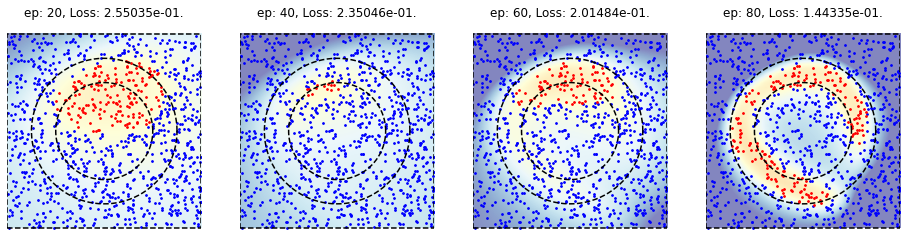

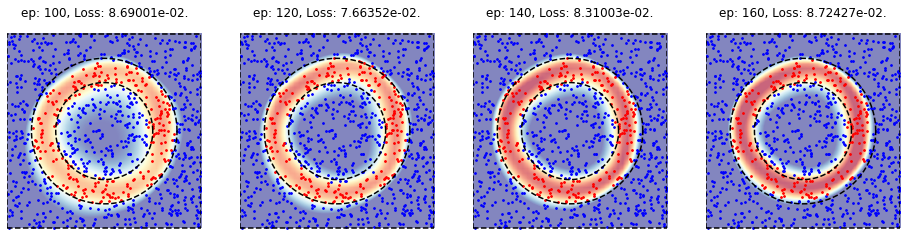

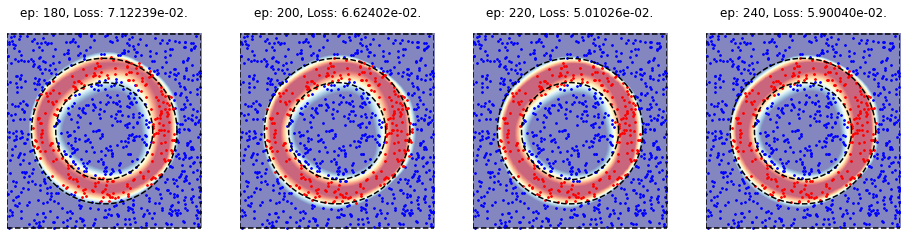

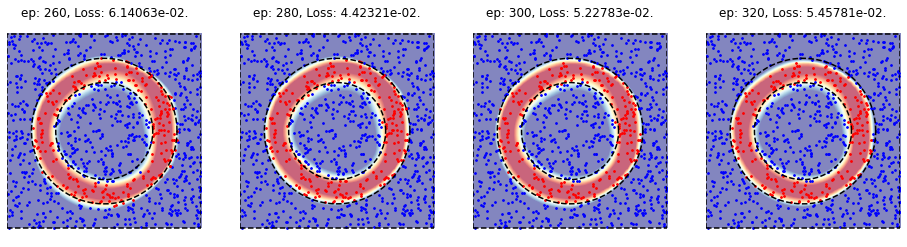

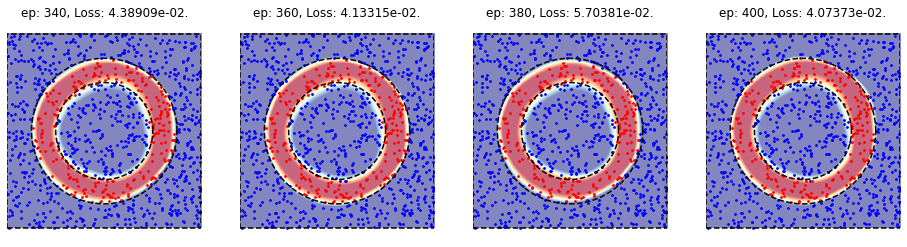

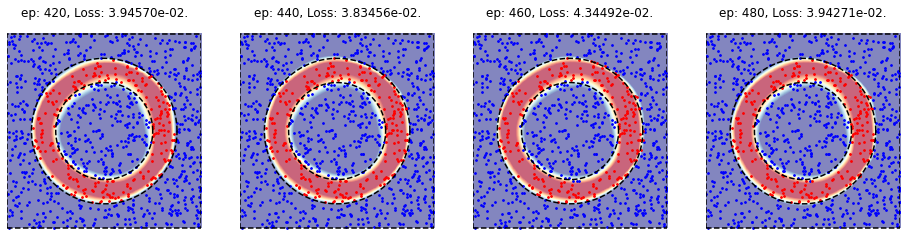

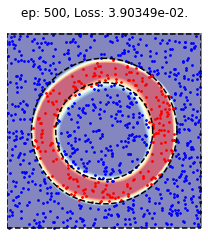

In [12]:
posplot=0
# Optimization loop for the stochastic gradient method with decaying learning rate
for i_ in range(Nepoch): # loop on the epochs
    nepoch+=1
    for j_ in range(ItersInOneEpoch):  # in each epoch, loop on the iterations
        J = nprd.randint(Ndata, size=nbatch)    # draw nbatch random integers 
        
        # computation of the descent direction
        dA=nn.create_zero()
        for i in J:   nn.descent(A, data.X[i], data.Y[i], B=dA, pb=pb)
        
        # update of the coefficients
        alphak=alpha0/(1 + k/K)
        nn.add(A,dA,c=alphak/nbatch,output=False)
        k+=1
    
    # computation of the error and graphic representations
    if not nepoch%nepochplot:
        error = nn.total_loss_and_prediction(A,data,pb=pb)
        Erreur.append(error)
        if not posplot: plt.figure(figsize=(16,4))
        posplot+=1
        plt.subplot(1,4,posplot)
        data.show_class(pred=True)
        nn.show_pred(A)
        pb.show_border('k--')
        plt.title(f"ep: {nepoch}, Loss: {error:1.5e}.", fontsize=12)
        if posplot==4 :  
            plt.show()
            posplot=0
    else:
        error = nn.total_loss(A,data,pb=pb)
        Erreur.append(error)
        #print(f"epoch {nepoch}, Total loss : {error:1.5e}.")

Graphic representations:

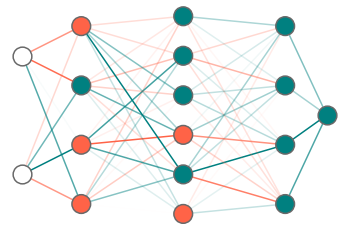

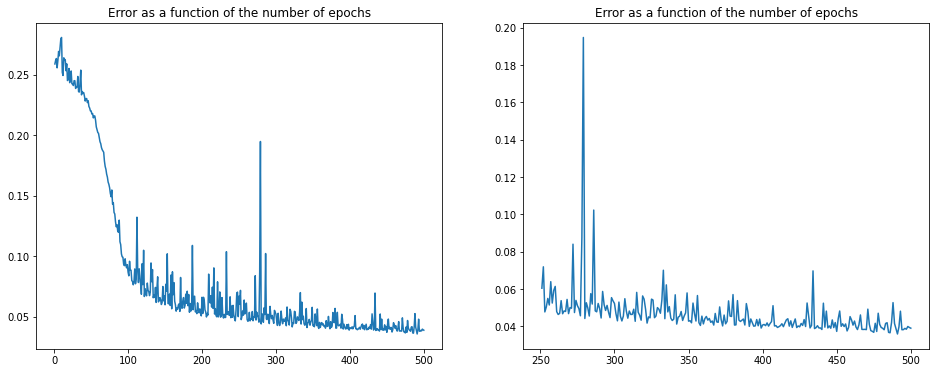

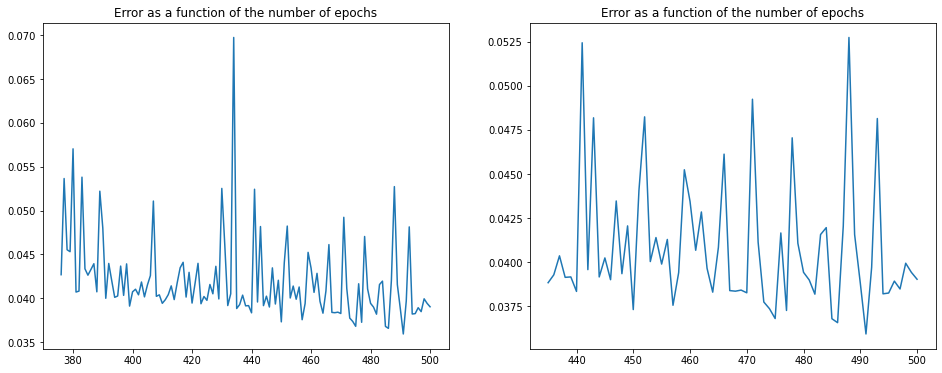

In [13]:
## Graphic representation of the evolution of the error along the iterations.
nn.show(A)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(np.linspace(1,nepoch,nepoch),Erreur)
plt.title("Error as a function of the number of epochs")

plt.subplot(122)
debut = nepoch//2
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Error as a function of the number of epochs")
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(121)
debut = 3*(nepoch//4)
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Error as a function of the number of epochs")

plt.subplot(122)
debut = 7*(nepoch//8)
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Error as a function of the number of epochs")
plt.show()


<a href="#toc">top</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#IV">4.</a>
&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

# End of file  <a id='bot'></a>